In [87]:
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Read in data

In [51]:
df= pd.read_csv("data/demand_inventory.csv", index_col=0)

# Convert column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.head()

,Date,Product_ID,Demand,Inventory
0,2023-06-01,P1,51,5500
1,2023-06-02,P1,141,5449
2,2023-06-03,P1,172,5308
3,2023-06-04,P1,91,5136
4,2023-06-05,P1,198,5045


# EDA

## Summary Stats

In [78]:
df.describe()

,Date,Demand,Inventory,day_of_week
count,62,62.000000,62.000000,62.000000
mean,2023-07-01 12:00:00,120.709677,2073.822581,3.016129
min,2023-06-01 00:00:00,51.000000,0.000000,0.000000
25%,2023-06-16 06:00:00,85.000000,25.500000,1.000000
50%,2023-07-01 12:00:00,124.000000,1908.000000,3.000000
75%,2023-07-16 18:00:00,152.750000,3594.250000,5.000000
max,2023-08-01 00:00:00,199.000000,5500.000000,6.000000
std,NaN,44.852906,1840.782144,2.028420


## Plot demand vs date

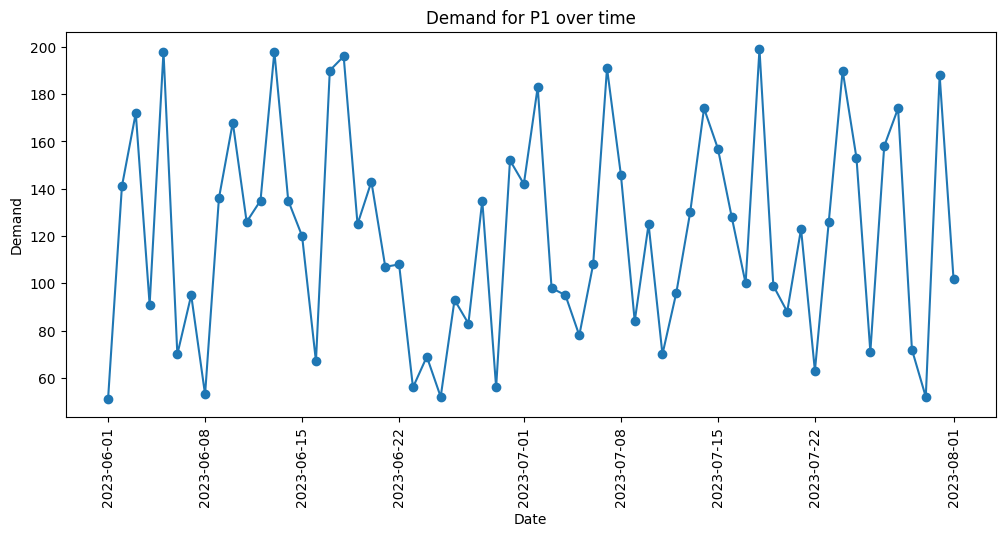

In [83]:
fig = plt.figure(figsize = (12, 5))

# creating the bar plot
plt.plot(df['Date'], df['Demand'], marker='o')

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Demand for P1 over time")
plt.show()

## Plot inventory vs date

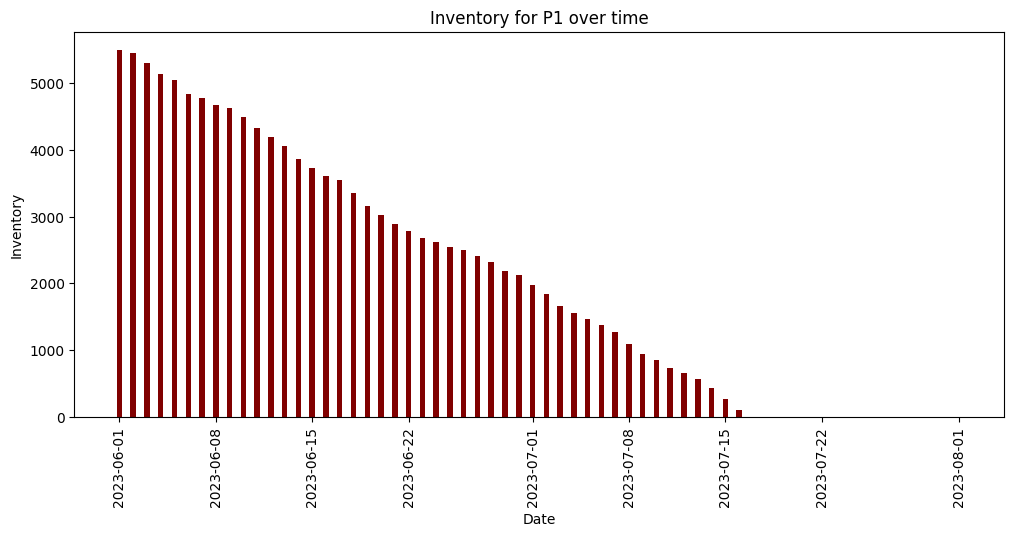

In [25]:
fig = plt.figure(figsize = (12, 5))

# creating the bar plot
plt.bar(df['Date'], df['Inventory'], color ='maroon', 
        width = 0.4)

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inventory")
plt.title("Inventory for P1 over time")
plt.show()

## Plot average demand per day of the week

In [62]:
df['day_of_week'] = df['Date'].dt.dayofweek

daily_means=df.groupby(['day_of_week'])['Demand'].mean()

daily_means=pd.DataFrame({'day_of_week':daily_means.index, 'mean_demand':daily_means.values})

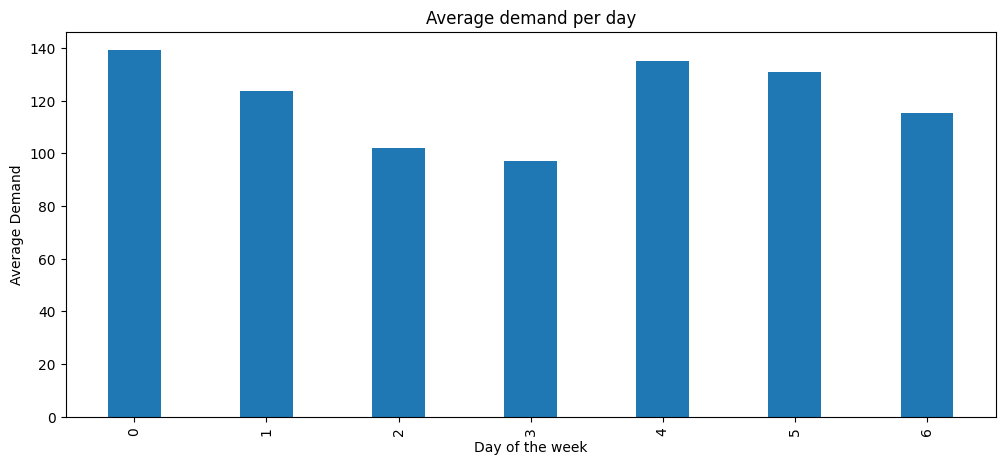

In [77]:
fig = plt.figure(figsize = (12, 5))

# creating the bar plot
plt.bar(daily_means['day_of_week'], daily_means['mean_demand'],
        width = 0.4)

plt.xticks(rotation=90)
plt.xlabel("Day of the week")
plt.ylabel("Average Demand")
plt.title("Average demand per day")
plt.show()

# Task

## Task 1: Utilize time series analysis to forecast the future demand for the given product

### ARIMA 

In [86]:
adf_test = adfuller(df['Demand'])

# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -7.518718
p-value: 0.000000


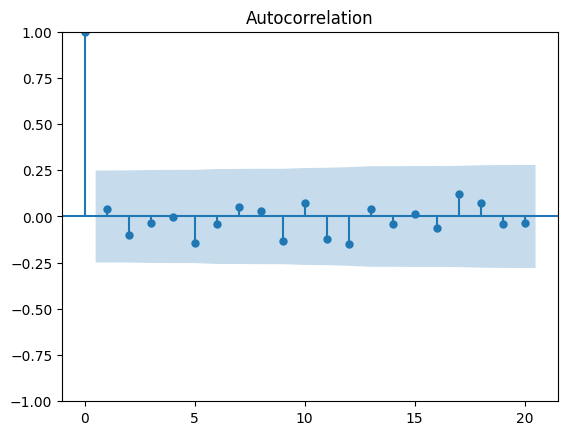

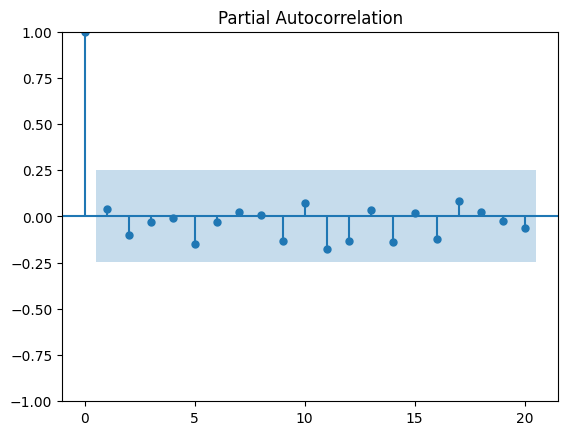

In [89]:
plot_acf(df['Demand'], lags=20)
plot_pacf(df['Demand'], lags=20)
plt.show()